In [ ]:
# pre-processing of train dataset
from PIL import Image, ImageEnhance, ImageOps, ImageFilter
import os

# Define paths to input and output folders
input_folder = "/content/drive/MyDrive/diseasesimage/train1/"
output_folder = "/content/drive/MyDrive/diseasesimage/output224/"

# Loop through images in input folder
for filename in os.listdir(input_folder):
    # Open image and convert to grayscale
    img = Image.open(os.path.join(input_folder, filename)).convert('L')

    # Resize image to 224*224 pixels
    img = img.resize((224, 224))

    # Enhance contrast by a factor of 1.5
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(1.5)

    # Perform histogram equalization
    img = ImageOps.equalize(img)

    # Apply sharpening filter
    img = img.filter(ImageFilter.SHARPEN)

    # Save pre-processed image to output folder
    img.save(os.path.join(output_folder, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import random
from shutil import copyfile

import numpy as np
from sklearn.model_selection import train_test_split

# Set the path to the folder containing the images
path = "/content/drive/MyDrive/diseasesimage/output224"

# Get the list of all image filenames
filenames = os.listdir(path)

# Split the filenames into training and testing sets
train_filenames, test_filenames = train_test_split(filenames, test_size=0.3, random_state=42)

# Create the test folder if it doesn't exist
test_path = os.path.join(path, "test")
if not os.path.exists(test_path):
    os.makedirs(test_path)

# Copy the test files to the test folder
for filename in test_filenames:
    src = os.path.join(path, filename)
    dst = os.path.join(test_path, filename)
    copyfile(src, dst)

print(f"{len(test_filenames)} images moved to test folder.")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121
from keras.models import load_model
from tensorflow.keras.models import Model

from sklearn.metrics import classification_report

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define data paths
train_path = "/content/drive/MyDrive/Plantdiseases/output224class/"



# Define image size and batch size
img_size = 224
batch_size = 32

# Define data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')



# Create data generators for training
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')




# Define DenseNet model
densenet_model = DenseNet121(include_top=False, input_shape=(img_size, img_size, 1))
densenet_model.trainable = True

# Add global average pooling layer and dense layers
densenet_output = densenet_model.output
densenet_output = GlobalAveragePooling2D()(densenet_output)
densenet_output = Dense(256, activation='relu')(densenet_output)
densenet_output = Dropout(0.5)(densenet_output)
densenet_output = Dense(train_generator.num_classes, activation='softmax')(densenet_output)


# Compile the model
#densenet_model = tf.keras.Model(inputs=densenet_model.inputs, outputs=densenet_output)
#densenet_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
densenet_model=load_model('/content/drive/MyDrive/Plantdiseases/savedense.h5')

# Train the DenseNet model
densenet_history = densenet_model.fit(train_generator, epochs=25)

# Save the model to a file
densenet_model.save('/content/drive/MyDrive/Plantdiseases/savedense.h5')

# Load the saved model
#model = load_model('/content/drive/MyDrive/Plantdiseases/savedense.h5')


Found 1520 images belonging to 5 classes.
Epoch 1/25
48/48 [==============================] - 92s 547ms/step - loss: 0.2682 - accuracy: 0.9092
Epoch 2/25
48/48 [==============================] - 25s 504ms/step - loss: 0.2900 - accuracy: 0.8888
Epoch 3/25
48/48 [==============================] - 25s 527ms/step - loss: 0.2461 - accuracy: 0.9118
Epoch 4/25
48/48 [==============================] - 25s 519ms/step - loss: 0.2632 - accuracy: 0.9053
Epoch 5/25
48/48 [==============================] - 25s 520ms/step - loss: 0.2087 - accuracy: 0.9257
Epoch 6/25
48/48 [==============================] - 25s 520ms/step - loss: 0.1717 - accuracy: 0.9375
Epoch 7/25
48/48 [==============================] - 25s 522ms/step - loss: 0.2022 - accuracy: 0.9355
Epoch 8/25
48/48 [==============================] - 24s 503ms/step - loss: 0.2642 - accuracy: 0.9053
Epoch 9/25
48/48 [==============================] - 25s 514ms/step - loss: 0.2092 - accuracy: 0.9191
Epoch 10/25
48/48 [==============================

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [ ]:
# Define the model
model = Sequential()
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))



# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
alexnet_model=load_model('/content/drive/MyDrive/Plantdiseases/savealex.h5')

# Set up data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


# Load the data
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Plantdiseases/output224class/',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

# Train the model
alexnet_history=alexnet_model.fit(train_generator, epochs=25)
# Save the model to a file
model.save('/content/drive/MyDrive/Plantdiseases/savealex.h5')
# Load the saved model
#model = load_model('/content/drive/MyDrive/Plantdiseases/savealex.h5')


Found 1520 images belonging to 5 classes.
Epoch 1/2
48/48 [==============================] - 255s 5s/step - loss: 0.7707 - accuracy: 0.6441
Epoch 2/2
48/48 [==============================] - 20s 426ms/step - loss: 0.7397 - accuracy: 0.6770


In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import concatenate, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set up data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


# Load the data
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Plantdiseases/output224class/',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')


# Load the saved DenseNet model
densenet_model = load_model('/content/drive/MyDrive/Plantdiseases/savedense.h5')

# Load the saved AlexNet model
alexnet_model = load_model('/content/drive/MyDrive/Plantdiseases/savealex.h5')

# Define input shape
input_shape = (224, 224, 3)

# Define input layer
input_layer = Input(shape=input_shape)

# Get output from DenseNet model
densenet_output = densenet_model(input_layer)

# Get output from AlexNet model
alexnet_output = alexnet_model(input_layer)

# Concatenate the outputs
merged_output = concatenate([densenet_output, alexnet_output])

merged_output = Dense(5, activation='softmax')(merged_output)

# Define the ensemble model
ensemble_model = Model(inputs=input_layer, outputs=merged_output)

# Freeze the layers in the DenseNet and AlexNet models
for layer in densenet_model.layers:
    layer.trainable = False

for layer in alexnet_model.layers:
    layer.trainable = False

# Compile the ensemble model
#ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ensemble_model=load_model('/content/drive/MyDrive/Plantdiseases/save_ensemble.h5')
# Train the ensemble model
ensemble_history = ensemble_model.fit(train_generator, epochs=25)

# Save the ensemble model
ensemble_model.save('/content/drive/MyDrive/Plantdiseases/save_ensemble.h5')



Found 1520 images belonging to 5 classes.
Epoch 1/25
48/48 [==============================] - 24s 427ms/step - loss: 0.8315 - accuracy: 0.8842
Epoch 2/25
48/48 [==============================] - 22s 455ms/step - loss: 0.7901 - accuracy: 0.8928
Epoch 3/25
48/48 [==============================] - 21s 431ms/step - loss: 0.7485 - accuracy: 0.8934
Epoch 4/25
48/48 [==============================] - 22s 458ms/step - loss: 0.7115 - accuracy: 0.9138
Epoch 5/25
48/48 [==============================] - 21s 426ms/step - loss: 0.6739 - accuracy: 0.9145
Epoch 6/25
48/48 [==============================] - 22s 456ms/step - loss: 0.6429 - accuracy: 0.9191
Epoch 7/25
48/48 [==============================] - 22s 463ms/step - loss: 0.6117 - accuracy: 0.9276
Epoch 8/25
48/48 [==============================] - 21s 431ms/step - loss: 0.5841 - accuracy: 0.9316
Epoch 9/25
48/48 [==============================] - 23s 478ms/step - loss: 0.5633 - accuracy: 0.9349
Epoch 10/25
48/48 [==============================

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved ensemble model
ensemble_model = load_model('/content/drive/MyDrive/Plantdiseases/save_ensemble.h5/')

# Set up data augmentation for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the test data
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Plantdiseases/testclass/',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

# Evaluate the model on the test data
test_loss, test_acc = ensemble_model.evaluate(test_generator)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Make predictions on the test data
predictions = ensemble_model.predict(test_generator)

# Convert the predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels
true_classes = test_generator.classes




Found 465 images belonging to 5 classes.
15/15 [==============================] - 107s 7s/step - loss: 0.2807 - accuracy: 0.9763
Test accuracy: 0.976344108581543
Test loss: 0.280737042427063
15/15 [==============================] - 108s 7s/step


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np

# Load the saved ensemble model
ensemble_model = load_model('/content/drive/MyDrive/Plantdiseases/save_ensemble.h5')

# Load a single image for prediction
img_path = '/content/drive/MyDrive/1.jpg' # replace with the path to your image
img = Image.open(img_path).resize((224, 224))
x = np.array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # rescale pixel values to between 0 and 1

# Set up data augmentation for testing
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Plantdiseases/testclass/',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

# Make a prediction
prediction = ensemble_model.predict(x)
predicted_class = np.argmax(prediction)

# Print the predicted class label
class_names = test_generator.class_indices
for name, value in class_names.items():
    if value == predicted_class:
        if name == 'class1':
            print('Predicted class: bacterial_leaf_blight')
        elif name == 'class2':
            print('Predicted class: brown_spot')
        elif name == 'class3':
            print('Predicted class: healthy_leaf')
        elif name == 'class4':
            print('Predicted class: leaf_blast')
        elif name == 'class5':
            print('Predicted class: narrow_brown_spot')
        elif class_names not in predicted_class:
            print("This disease is something else.")
        break

Found 465 images belonging to 5 classes.
1/1 [==============================] - 2s 2s/step
Predicted class: brown_spot


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import os

# Load the saved ensemble model
ensemble_model = load_model('/content/drive/MyDrive/Plantdiseases/save_ensemble.h5')

# Set up data augmentation for testing
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Plantdiseases/testclass/',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

# Loop through a directory of images and make predictions
images_dir = '/content/drive/MyDrive/new_data/'

true_labels = []
predicted_labels = []

for filename in os.listdir(images_dir):
    if filename.endswith('.jpg'):
        # Load the image
        img_path = os.path.join(images_dir, filename)
        img = Image.open(img_path).resize((224, 224))
        x = np.array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0  # rescale pixel values to between 0 and 1

        # Make a prediction
        prediction = ensemble_model.predict(x)
        predicted_class = np.argmax(prediction)

        # Get the true class label
        true_class = filename
        true_labels.append(true_class)

        # Print the predicted and true class labels
        class_names = test_generator.class_indices
        for name, value in class_names.items():
          if value == predicted_class:
            if name == 'class1':
              print(f"{filename}: Predicted class: bacterial_leaf_blight, True class: {true_class}")
            elif name == 'class2':
              print(f"{filename}: Predicted class: brown_spot, True class: {true_class}")
            elif name == 'class3':
              print(f"{filename}: Predicted class: healthy_leaf, True class: {true_class}")
            elif name == 'class4':
              print(f"{filename}: Predicted class: leaf_blast, True class: {true_class}")
            elif name == 'class5':
              print(f"{filename}: Predicted class: narrow_brown_spot, True class: {true_class}")
            else:
              print(f"{filename}: This disease is something else., True class: {true_class}")
            break

        predicted_labels.append(predicted_class)



Found 465 images belonging to 5 classes.
1/1 [==============================] - 3s 3s/step
narrow_brown (58).jpg: Predicted class: leaf_blast, True class: narrow_brown (58).jpg
1/1 [==============================] - 0s 50ms/step
bacterial_leaf_blight (34).jpg: Predicted class: leaf_blast, True class: bacterial_leaf_blight (34).jpg
1/1 [==============================] - 0s 43ms/step
healthy (1).jpg: Predicted class: healthy_leaf, True class: healthy (1).jpg
1/1 [==============================] - 0s 32ms/step
healthy (11).jpg: Predicted class: brown_spot, True class: healthy (11).jpg
1/1 [==============================] - 0s 31ms/step
healthy (4).jpg: Predicted class: healthy_leaf, True class: healthy (4).jpg
1/1 [==============================] - 0s 29ms/step
leaf_blast (10).jpg: Predicted class: leaf_blast, True class: leaf_blast (10).jpg
1/1 [==============================] - 0s 29ms/step
leaf_blast (11).jpg: Predicted class: leaf_blast, True class: leaf_blast (11).jpg
1/1 [==========

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load the saved ensemble model
ensemble_model = load_model('/content/drive/MyDrive/Plantdiseases/save_ensemble.h5')

# Load the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Plantdiseases/testclass/',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=False)

# Generate predictions on the test data
y_pred = ensemble_model.predict(test_generator)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
test_classes = test_generator.classes

# Calculate precision, recall, and F1 score
report = classification_report(test_classes, y_pred_classes)
print(report)


Found 465 images belonging to 5 classes.
15/15 [==============================] - 4s 110ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        99
           1       0.97      1.00      0.99       116
           2       0.99      0.97      0.98       113
           3       0.96      0.94      0.95       116
           4       1.00      1.00      1.00        21

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465



Text(50.72222222222221, 0.5, 'Actual')

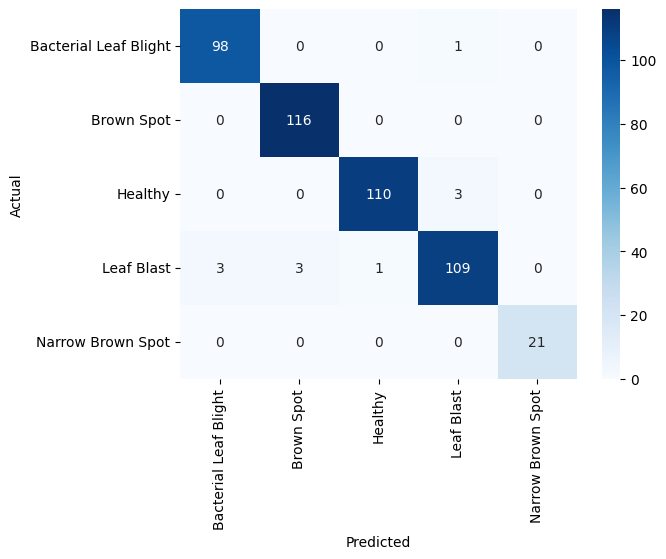

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np


# Generate the confusion matrix
cm = confusion_matrix(test_classes, y_pred_classes)

# Define the class labels
class_labels = ['Bacterial Leaf Blight', 'Brown Spot', 'Healthy','Leaf Blast','Narrow Brown Spot']

# Visualize the confusion matrix using a heatmap with labeled axes
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)

# Add axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
